In [9]:
import numpy as np


# Python/Scipy version

In [14]:
from scipy import stats
import matplotlib.pyplot as plt 

data_col1 = np.random.randn(50000)
print(data_col1)

[-0.35765076  1.12437825  0.44046479 ...  0.19204732  0.41584933
 -1.06710839]


In [17]:
k = stats.kurtosis(data_col1)

In [19]:
distnames = ['laplace', 'norm', 'uniform']

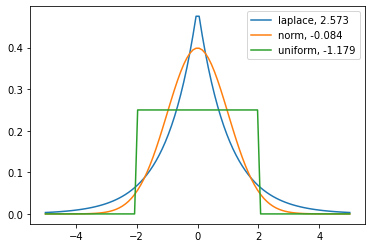

In [25]:
x = np.linspace(-5,5,100)
ax = plt.subplot()
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

In [26]:
dd = stats.bernoulli(p=0.6)

In [43]:
dd.rvs(1)

array([0])

In [30]:

x = np.random.rand(1000)
ax.plot(x, dd.pmf(x))
plt.show()

In [55]:
def recover_distribution(N, mean, mode, median, range, moments, variance):
    """
    통계학자들이 만들어내길 기대...  
    
    예) 
    1. R의 momentify 패키지(https://stats.stackexchange.com/questions/141652/constructing-a-continuous-distribution-to-match-m-moments); 
    2. https://en.wikipedia.org/wiki/Pearson_distribution 
    """
    a, b = 2.31, 0.627
    dist = stats.beta(a, b)
    # check
    mean, var, skew, kurt = dist.stats(moments='mvsk')
    print(mean, var, skew, kurt)
    # input의 mean, var, skew, kurt와 거의 일치하는 값이 나와야함. 
    
    return dist.rvs(size=N)

In [57]:
newdata = recover_distribution(1000, 
                               0.7865168539325842, 
                               0.4, 
                               0.432, 
                               [-0.4, 1.2], 
                               [0.5, 0.3, -1.1240714863228223, 0.5654574834055228], 
                               0.04264874077027537)

0.7865168539325842 0.04264874077027537 -1.1240714863228223 0.5654574834055228


(array([  8.,  11.,  22.,  43.,  48.,  69.,  90., 125., 199., 385.]),
 array([0.07148899, 0.16433992, 0.25719085, 0.35004178, 0.44289271,
        0.53574364, 0.62859457, 0.72144549, 0.81429642, 0.90714735,
        0.99999828]),
 <BarContainer object of 10 artists>)

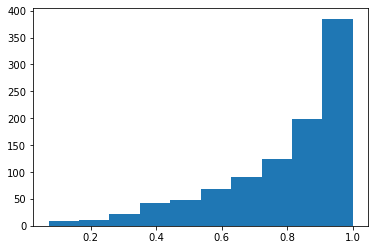

In [58]:
plt.hist(newdata)

예) 민감점보의 summary statistics를 구하여 proxy 분포를 얻어내고, 그 분포를 통계 분석에 활용. 

### Univariate
mean, median, mode, 25- 75 percentile, var, std, 1,2,3,4-th moment(Skewness, Kurtosis), ...

proxy_data = make_fake_dist(mean, median, mode, 25- 75 percentile, var, std, 1,2,3,4-th moment(Skewness, Kurtosis))
##### do fancy plots

In [ ]:
class HomomorphicStatistics()
    def __init__(self):
        pass
    def kurtosis(self, ctxt):
        return stats.kurtosis

# Client side

## establish connection to server

## Encrypt data locally

## run local analysis script

In [ ]:
## local analysis script



std = 

In [5]:
data_col1 = np.random.rand(50000000)
print(data_col1)

[0.26087087 0.57244416 0.2727303  ... 0.36360699 0.10566148 0.69670038]


In [6]:
enc_data = data_col1

# Server

## load homomorphic_stat package

In [7]:
recieved_data = enc_data

In [ ]:
k = hst.kurtosis(recieved_data)